In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as s

np.random.seed(42)

In [2]:
data = pd.read_csv("train-bank-campaign-data.csv")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,id_var
0,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,65790
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,55643
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,66189
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,70807
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,42625


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'id_var'],
      dtype='object')

In [5]:
data.shape

(37084, 22)

In [6]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
id_var              int64
dtype: object

In [7]:
stats = data.describe().T
stats['unique'] = [len(data[column].unique()) for column in stats.index]
stats['null'] = [data[column].isnull().sum() for column in stats.index]
stats['unknown'] = [(data[column] == "unknown").sum() for column in stats.index]
stats

,count,mean,std,min,25%,50%,75%,max,unique,null,unknown
age,37084.0,40.042714,10.432965,17.000,32.000,38.000,47.000,98.000,77,0,0
duration,37084.0,258.237946,258.730909,0.000,102.000,180.000,319.250,4918.000,1509,0,0
campaign,37084.0,2.569545,2.770611,1.000,1.000,2.000,3.000,56.000,42,0,0
pdays,37084.0,962.530849,186.773063,0.000,999.000,999.000,999.000,999.000,27,0,0
previous,37084.0,0.172986,0.495681,0.000,0.000,0.000,0.000,7.000,8,0,0
emp.var.rate,37084.0,0.082669,1.568997,-3.400,-1.800,1.100,1.400,1.400,10,0,0
cons.price.idx,37084.0,93.576076,0.578493,92.201,93.075,93.749,93.994,94.767,26,0,0
cons.conf.idx,37084.0,-40.505183,4.622045,-50.800,-42.700,-41.800,-36.400,-26.900,26,0,0
euribor3m,37084.0,3.621668,1.733972,0.634,1.344,4.857,4.961,5.045,314,0,0
nr.employed,37084.0,5167.058664,72.196605,4963.600,5099.100,5191.000,5228.100,5228.100,11,0,0


In [8]:
data['pdays'].value_counts()

999    35722
3        398
6        361
4        105
9         57
2         56
12        54
7         51
10        46
5         43
13        34
11        28
1         25
14        20
15        19
8         18
0         12
16        11
17         8
18         4
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [9]:
cat_stats = data.describe(include=['object']).T
cat_stats['null'] = [data[column].isnull().sum() for column in cat_stats.index]
cat_stats['unknown'] = [(data[column] == "unknown").sum() for column in cat_stats.index]
cat_stats

,count,unique,top,freq,null,unknown
job,37084,12,admin.,9420,0,306
marital,37084,4,married,22479,0,72
education,37084,8,university.degree,10971,0,1549
default,37084,3,no,29382,0,7700
housing,37084,3,yes,19433,0,882
loan,37084,3,no,30561,0,882
contact,37084,2,cellular,23522,0,0
month,37084,10,may,12420,0,0
day_of_week,37084,5,thu,7778,0,0
poutcome,37084,3,nonexistent,32023,0,0


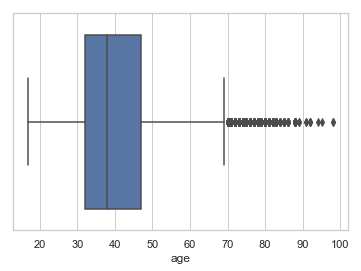

In [10]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=data['age'])

In [11]:
def numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(s.zscore(x)) < z_thresh, reduce=False).all(axis=1)
    # Drop (inplace) values set to be rejected
    return constrains

In [12]:
outliers = pd.DataFrame(numerical_outliers(data), columns = ['outlier'])
outliers['outlier'].value_counts()

True     33580
False     3504
Name: outlier, dtype: int64

In [13]:
data['y'].value_counts()

no     32876
yes     4208
Name: y, dtype: int64

What does all this information tell us?

1) There is not null values

2) We can see which columns don't contain useful information for our predictions:

* The id_var column contains a unique identifier for each row and will not be useful for prediction.

* The duration column is the last contact duration. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

3) The column y is categorical, so we have to transform it to numerical.

4) The column pvalue has a value of 999 when the client was not previously contacted, and it's very different from the rest of the values. We don't want to consider 999 as outlier since there is a lot of rows with this value. In this case we decide to drop this column, since could be confused for ML algorithms.

5) There are some outliers. We have to remove them.

6) The dependent variable is unbalance, so we have to balance it.

7) We should analyze the correlation of numerical features and delete the columns highly correlated.

8) Transform categorical features to numerical using one-hot encode (get_dummmies).

In [14]:
df =  data.copy()

In [15]:
df.drop(columns = ['id_var', 'duration', 'pdays'], inplace = True)
df.reset_index(drop=True, inplace=True)

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,24,technician,single,professional.course,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(s.zscore(x)) < z_thresh, reduce=False).all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

In [18]:
drop_numerical_outliers(df)
df.shape

(35055, 19)

In [19]:
df['y'].value_counts()

no     31487
yes     3568
Name: y, dtype: int64

In [20]:
def decimal_str(x: float, decimals: int = 10) -> str:
    return format(x, f".{decimals}f").lstrip().rstrip('0')
    
def interpret(alpha, p_val):
    print(f"Probability results occurred by chance: {decimal_str(p_val, 30)}.\nIs our p-value less than the alpha? {'Yes. We reject the null hypothesis! Kill it with fire!' if p_val < alpha else 'No. Our null hypothesis is correct.'}")

In [21]:
def check(list1, val): 
    return(any(x < val for x in list1))

In [22]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [23]:
newdf = df[['age', 'campaign']] # I tried with all numeric columns but I never accept the H0 for all of them at the same time, so I am only using the most important (age and campaign) 
column_list = [x for x in newdf.columns]
t_test_results = {}
alpha = 0.05

pvalue = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]
i = 500

while check(pvalue, alpha) and i!=0:
    df_sample = df.where(df['y'] == 'no').sample(n = 4000).dropna()
    for column in column_list:
        group1 = df_sample[column]
        group2 = newdf[column]
        t_test_results[column] = s.ttest_ind(group1, group2)
    results_df = pd.DataFrame.from_dict(t_test_results, orient='Index')
    results_df.columns = ['statistic','pvalue']
    pvalue = list(results_df['pvalue'])
    i = i - 1

results_df    

,statistic,pvalue
age,0.848558,0.396133
campaign,0.944582,0.344878


In [24]:
alpha = .05
pvalue = list(results_df['pvalue'])
for x in pvalue:
    print(x)
    interpret(alpha, x)

0.3961326562688774
Probability results occurred by chance: 0.396132656268877392236049672647.
Is our p-value less than the alpha? No. Our null hypothesis is correct.
0.3448780230976022
Probability results occurred by chance: 0.34487802309760218211209803485.
Is our p-value less than the alpha? No. Our null hypothesis is correct.


In [25]:
df_sample.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
17850,44.0,services,married,high.school,unknown,yes,yes,cellular,aug,fri,1.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
9541,54.0,blue-collar,married,basic.9y,unknown,no,no,telephone,jun,tue,1.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
31582,33.0,services,divorced,high.school,no,yes,no,cellular,may,fri,3.0,0.0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
33800,22.0,student,single,high.school,no,no,no,cellular,aug,thu,2.0,1.0,success,-2.9,92.201,-31.4,0.873,5076.2,no
31334,30.0,services,single,high.school,no,yes,no,cellular,may,thu,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no


In [26]:
df_sample.shape

(3591, 19)

In [27]:
df_sample = df_sample.append(df.where(df['y'] == 'yes').dropna())

In [28]:
df_sample.shape

(7159, 19)

In [29]:
df_sample['y'].value_counts()

no     3591
yes    3568
Name: y, dtype: int64

In [30]:
df = df_sample.copy().reset_index()

In [31]:
df.drop(columns = 'index', inplace = True)

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,44.0,services,married,high.school,unknown,yes,yes,cellular,aug,fri,1.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
1,54.0,blue-collar,married,basic.9y,unknown,no,no,telephone,jun,tue,1.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
2,33.0,services,divorced,high.school,no,yes,no,cellular,may,fri,3.0,0.0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
3,22.0,student,single,high.school,no,no,no,cellular,aug,thu,2.0,1.0,success,-2.9,92.201,-31.4,0.873,5076.2,no
4,30.0,services,single,high.school,no,yes,no,cellular,may,thu,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no


In [33]:
# Label Encoding
df['target'] = np.where(df['y'] == "yes", 1, 0)
df.drop(columns = 'y', inplace = True)

In [34]:
features = df[[col for col in df if col not in ['target']]].reset_index(drop = True)
features.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,44.0,services,married,high.school,unknown,yes,yes,cellular,aug,fri,1.0,0.0,nonexistent,1.4,93.444,-36.1,4.966,5228.1
1,54.0,blue-collar,married,basic.9y,unknown,no,no,telephone,jun,tue,1.0,0.0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
2,33.0,services,divorced,high.school,no,yes,no,cellular,may,fri,3.0,0.0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1
3,22.0,student,single,high.school,no,no,no,cellular,aug,thu,2.0,1.0,success,-2.9,92.201,-31.4,0.873,5076.2
4,30.0,services,single,high.school,no,yes,no,cellular,may,thu,2.0,0.0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1


In [35]:
target = df[['target']]

In [36]:
corr_matrix = features.corr().abs()
corr_matrix

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.008741,0.001710,0.031827,0.015247,0.110347,0.039423,0.021799
campaign,0.008741,1.000000,0.091417,0.174285,0.123420,0.012456,0.155597,0.158123
previous,0.001710,0.091417,1.000000,0.408498,0.250721,0.034562,0.426543,0.432162
emp.var.rate,0.031827,0.174285,0.408498,1.000000,0.763026,0.008871,0.963196,0.888519
cons.price.idx,0.015247,0.123420,0.250721,0.763026,1.000000,0.105234,0.645908,0.456507
cons.conf.idx,0.110347,0.012456,0.034562,0.008871,0.105234,1.000000,0.092141,0.060824
euribor3m,0.039423,0.155597,0.426543,0.963196,0.645908,0.092141,1.000000,0.944322
nr.employed,0.021799,0.158123,0.432162,0.888519,0.456507,0.060824,0.944322,1.000000


[Text(0.5, 0, 'age'),
 Text(1.5, 0, 'campaign'),
 Text(2.5, 0, 'previous'),
 Text(3.5, 0, 'emp.var.rate'),
 Text(4.5, 0, 'cons.price.idx'),
 Text(5.5, 0, 'cons.conf.idx'),
 Text(6.5, 0, 'euribor3m'),
 Text(7.5, 0, 'nr.employed')]

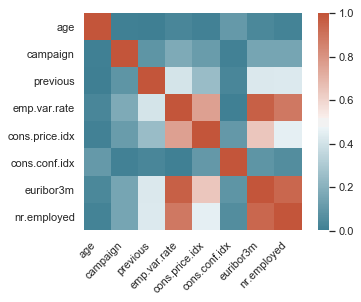

In [37]:
ax = sns.heatmap(
    corr_matrix, #data

    cmap = sns.diverging_palette(
        220, # Anchor hue (negative)
        20, # Anchor hue (positive)
        n = 360 #Number of colors in the palette (optional)
    ),
    square = True,
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
)

In [38]:
tri = np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool)
upper = corr_matrix.where(tri)
# Find index of feature columns with correlation greater than 90%
to_drop = [col for col in upper.columns if any(upper[col] > 0.9)]
to_drop

['euribor3m', 'nr.employed']

In [39]:
# Drop highly colinear features
features.drop(features[to_drop], axis = 1, inplace = True)
features.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx
0,44.0,services,married,high.school,unknown,yes,yes,cellular,aug,fri,1.0,0.0,nonexistent,1.4,93.444,-36.1
1,54.0,blue-collar,married,basic.9y,unknown,no,no,telephone,jun,tue,1.0,0.0,nonexistent,1.4,94.465,-41.8
2,33.0,services,divorced,high.school,no,yes,no,cellular,may,fri,3.0,0.0,nonexistent,-1.8,92.893,-46.2
3,22.0,student,single,high.school,no,no,no,cellular,aug,thu,2.0,1.0,success,-2.9,92.201,-31.4
4,30.0,services,single,high.school,no,yes,no,cellular,may,thu,2.0,0.0,nonexistent,-1.8,92.893,-46.2


In [40]:
cat_data = df.select_dtypes(include=['object']).copy()

In [41]:
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [42]:
cat_data_dummies = pd.get_dummies(df[cat_data.columns])
cat_data_dummies

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [43]:
df1 = features.copy()
df1.drop(columns = cat_data.columns, inplace = True)
df1.head()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,44.0,1.0,0.0,1.4,93.444,-36.1
1,54.0,1.0,0.0,1.4,94.465,-41.8
2,33.0,3.0,0.0,-1.8,92.893,-46.2
3,22.0,2.0,1.0,-2.9,92.201,-31.4
4,30.0,2.0,0.0,-1.8,92.893,-46.2


In [44]:
features = cat_data_dummies.merge(df1, on=df1.index)

In [45]:
features.drop(columns = 'key_0', inplace = True)

In [46]:
features.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,44.0,1.0,0.0,1.4,93.444,-36.1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,54.0,1.0,0.0,1.4,94.465,-41.8
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,33.0,3.0,0.0,-1.8,92.893,-46.2
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,22.0,2.0,1.0,-2.9,92.201,-31.4
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,30.0,2.0,0.0,-1.8,92.893,-46.2


In [47]:
features.to_csv(r'C:\Users\Ironhack\Documents\Ironhack\Final Project\marketing-campaign-effectiveness\features.csv')

In [48]:
target.to_csv(r'C:\Users\Ironhack\Documents\Ironhack\Final Project\marketing-campaign-effectiveness\target.csv')

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier


classifiers = {'Logistic Regression': LogisticRegression(solver = 'lbfgs'),
              'Gaussian NB': GaussianNB(),
              'Bernoulli NB': BernoulliNB(),
              'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
              'KNeighborsClassifier': KNeighborsClassifier(), 
              'Linear SVC': LinearSVC(),
              'Neural Network':  MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)}
              
def compare_models(x, y, model_dict, folds=5):
    results = []
    for name, model in model_dict.items():
        scores = cross_val_score(model, x, y, cv=folds)
        stats = [name, scores.mean(), min(scores), max(scores), scores.std(), pd.Series(scores).mad(), scores]
        results.append(stats)
    df = pd.DataFrame(results, columns = ['Model', 'Mean', 'Min', 'Max','Std', 'Mad', 'Score'])
    df = df.sort_values('Mean', ascending = False)
    return df

In [52]:
compare_models(features, target, classifiers, folds=5)

,Model,Mean,Min,Max,Std,Mad,Score
2,Bernoulli NB,0.630059,0.348221,0.798043,0.160731,0.125163,"[0.34822051639916257, 0.6187150837988827, 0.61..."
0,Logistic Regression,0.622385,0.377530,0.848358,0.178536,0.164566,"[0.377529658060014, 0.5460893854748603, 0.5321..."
1,Gaussian NB,0.611453,0.449407,0.735849,0.105354,0.091411,"[0.4494068387997209, 0.5970670391061452, 0.559..."
3,Random Forest,0.583678,0.350314,0.863033,0.165977,0.127607,"[0.35031402651779486, 0.539804469273743, 0.541..."
5,Linear SVC,0.513767,0.498253,0.573725,0.029982,0.023983,"[0.49965108164689465, 0.49860335195530725, 0.4..."
6,Neural Network,0.501606,0.501397,0.501747,0.000171,0.000168,"[0.5017445917655269, 0.5013966480446927, 0.501..."
4,KNeighborsClassifier,0.495787,0.362875,0.659679,0.099737,0.082476,"[0.3628750872295883, 0.47835195530726254, 0.43..."


In [53]:
data = features.merge(target, on = features.index)
data.drop(columns = 'key_0', inplace = True)

In [54]:
data.to_csv(r'C:\Users\Ironhack\Documents\Ironhack\Final Project\marketing-campaign-effectiveness\data.csv')